In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('/odinn/tmp/benediktj/Data/SplicePrediction-050422/spliceai_10k_test_set_predictions.gz')
df2 = pd.read_csv('/odinn/tmp/benediktj/Data/SplicePrediction-050422/transformer_40k_test_set_predictions.gz')

In [4]:
df1

,Y_true_acceptor,Y_pred_acceptor,Y_true_donor,Y_pred_donor
0,0.0,8.532154e-08,0.0,6.634749e-06
1,0.0,6.401241e-08,0.0,4.840474e-06
2,0.0,2.087532e-08,0.0,6.404113e-06
3,0.0,2.247980e-08,0.0,2.476002e-06
4,0.0,7.029085e-08,0.0,6.895135e-06
...,...,...,...,...
665119995,0.0,6.137076e-08,0.0,6.534361e-08
665119996,0.0,5.226409e-08,0.0,5.734462e-08
665119997,0.0,6.976883e-08,0.0,5.553063e-08
665119998,0.0,6.845510e-08,0.0,5.712389e-08


In [33]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score
import numpy as np

In [34]:
precision1, recall1, thresholds1 = precision_recall_curve(df1.Y_true_acceptor, df1.Y_pred_acceptor)
precision2, recall2, thresholds2 = precision_recall_curve(df2.Y_true_acceptor, df2.Y_pred_acceptor)
ap1 = average_precision_score(df1.Y_true_acceptor, df1.Y_pred_acceptor)
ap2 = average_precision_score(df2.Y_true_acceptor, df2.Y_pred_acceptor)

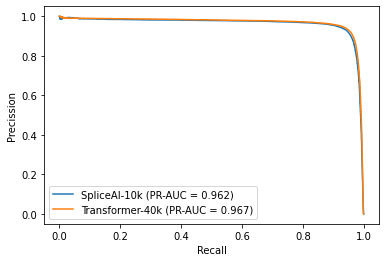

In [36]:
plt.plot(recall1,precision1,label="SpliceAI-10k (PR-AUC = {})".format(np.round(ap1,3)))
plt.plot(recall2,precision2,label="Transformer-40k (PR-AUC = {})".format(np.round(ap2,3)))
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.show()

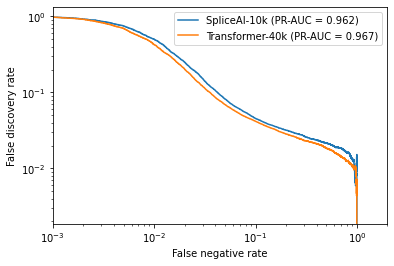

In [40]:
plt.loglog(1-recall1,1-precision1,label="SpliceAI-10k (PR-AUC = {})".format(np.round(ap1,3)))
plt.loglog(1-recall2,1-precision2,label="Transformer-40k (PR-AUC = {})".format(np.round(ap2,3)))
plt.legend()
plt.xlim(1e-3,2)
plt.xlabel('False negative rate')
plt.ylabel('False discovery rate')
plt.show()

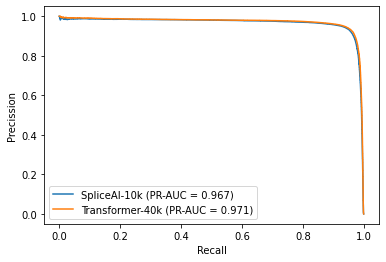

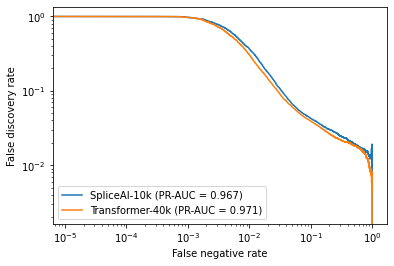

In [41]:
precision1, recall1, thresholds1 = precision_recall_curve(df1.Y_true_donor, df1.Y_pred_donor)
precision2, recall2, thresholds2 = precision_recall_curve(df2.Y_true_donor, df2.Y_pred_donor)
ap1 = average_precision_score(df1.Y_true_donor, df1.Y_pred_donor)
ap2 = average_precision_score(df2.Y_true_donor, df2.Y_pred_donor)

plt.plot(recall1,precision1,label="SpliceAI-10k (PR-AUC = {})".format(np.round(ap1,3)))
plt.plot(recall2,precision2,label="Transformer-40k (PR-AUC = {})".format(np.round(ap2,3)))
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.show()

plt.loglog(1-recall1,1-precision1,label="SpliceAI-10k (PR-AUC = {})".format(np.round(ap1,3)))
plt.loglog(1-recall2,1-precision2,label="Transformer-40k (PR-AUC = {})".format(np.round(ap2,3)))
plt.legend()
plt.xlabel('False negative rate')
plt.ylabel('False discovery rate')
plt.show()

In [ ]:
precision1, recall1, thresholds1 = precision_recall_curve(df1.Y_true_acceptor+df1.Y_true_donor, df1.Y_pred_acceptor+df1.Y_pred_donor)
precision2, recall2, thresholds2 = precision_recall_curve(df2.Y_true_acceptor+df2.Y_true_donor, df2.Y_pred_acceptor+df2.Y_pred_donor)
ap1 = average_precision_score(df1.Y_true_acceptor+df1.Y_true_donor, df1.Y_pred_acceptor+df1.Y_pred_donor)
ap2 = average_precision_score(df2.Y_true_acceptor+df2.Y_true_donor, df2.Y_pred_acceptor+df2.Y_pred_donor)

plt.plot(recall1,precision1,label="SpliceAI-10k (PR-AUC = {})".format(np.round(ap1,3)))
plt.plot(recall2,precision2,label="Transformer-40k (PR-AUC = {})".format(np.round(ap2,3)))
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.show()

plt.loglog(1-recall1,1-precision1,label="SpliceAI-10k (PR-AUC = {})".format(np.round(ap1,3)))
plt.loglog(1-recall2,1-precision2,label="Transformer-40k (PR-AUC = {})".format(np.round(ap2,3)))
plt.legend()
plt.xlabel('False negative rate')
plt.ylabel('False discovery rate')
plt.show()

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_predictions(df.Y_true_acceptor+df.Y_true_donor, (df.Y_pred_acceptor+df.Y_pred_donor)>=0.5)
plt.show()

In [ ]:
#from sklearn.metrics import det_curve
#fpr, fnr, thresholds = det_curve(df.Y_true_acceptor+df.Y_true_donor, df.Y_pred_acceptor+df.Y_pred_donor)

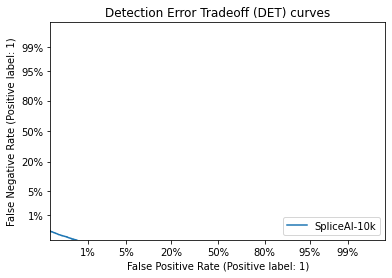

In [20]:
from sklearn.metrics import DetCurveDisplay

display = DetCurveDisplay.from_predictions(df.Y_true_acceptor+df.Y_true_donor, df.Y_pred_acceptor+df.Y_pred_donor, name="SpliceAI-10k")
_ = display.ax_.set_title("Detection Error Tradeoff (DET) curves")

In [5]:
from sklearn.metrics import det_curve
fpr1, fnr1, thresholds1 = det_curve(df1.Y_true_acceptor+df1.Y_true_donor, df1.Y_pred_acceptor+df1.Y_pred_donor)
fpr2, fnr2, thresholds1 = det_curve(df2.Y_true_acceptor+df2.Y_true_donor, df2.Y_pred_acceptor+df2.Y_pred_donor)

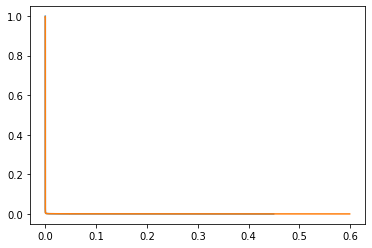

In [6]:
plt.plot(fpr1, fnr1)
plt.plot(fpr2, fnr2)
plt.show()

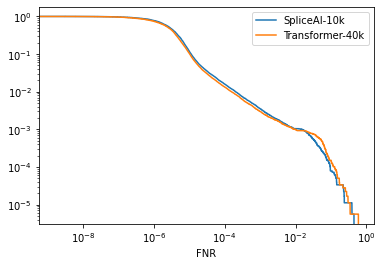

In [8]:
plt.loglog(fpr1, fnr1,label="SpliceAI-10k")
plt.loglog(fpr2, fnr2,label="Transformer-40k")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.show()

In [9]:
from sklearn.utils.class_weight import compute_class_weight

In [16]:
tmp = compute_class_weight(class_weight="balanced",classes = [0,1], y = df1.Y_true_acceptor+df1.Y_true_donor)

In [17]:
tmp

array([5.00134917e-01, 1.85348671e+03])

In [20]:
sample_weight = [tmp[int(x)] for x in (df1.Y_true_acceptor+df1.Y_true_donor)]

In [21]:
fpr1, fnr1, thresholds1 = det_curve(df1.Y_true_acceptor+df1.Y_true_donor, df1.Y_pred_acceptor+df1.Y_pred_donor,sample_weight=sample_weight)
fpr2, fnr2, thresholds2 = det_curve(df2.Y_true_acceptor+df2.Y_true_donor, df2.Y_pred_acceptor+df2.Y_pred_donor,sample_weight=sample_weight)

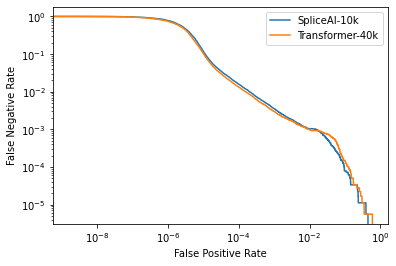

In [23]:
plt.loglog(fpr1, fnr1,label="SpliceAI-10k")
plt.loglog(fpr2, fnr2,label="Transformer-40k")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.show()